<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/1_VN_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Khai báo thư viện sử dụng

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape


# Tải dữ liệu

In [ ]:
tien_folder = "/content/drive/MyDrive/tien/"

pixels,labels=list(),list()
for folder in listdir(tien_folder):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(tien_folder  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(tien_folder  + folder +"/" + file)
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)


Folder= 00000
Folder= 5000
Folder= 100000
Folder= 200000
Folder= 500000
Folder= 1000
Folder= 10000
Folder= 20000
Folder= 50000
Folder= 2000


In [ ]:

save('tien.npy',pixels)
save('tien.npy',labels)



# tạo one_hot_encoding cho label

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()

labels = encoder.fit_transform(labels)
#print(labels)
file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
#print(file)
file.close()


In [ ]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

(328, 144, 192, 3)
(82, 144, 192, 3)


In [ ]:

X_train = X_train.reshape(328,144,192,3)
X_test= X_test.reshape(82,144,192,3)
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255


(328, 10)


In [ ]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=23    #số lần học
classes=10    #phân loại

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(144,192,3),padding='same'))
from keras.layers import LeakyReLU
#---------------------------------------------
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#-----------------------------------------------------
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 192, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 144, 192, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 96, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 96, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 72, 96, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 48, 64)       0         
 2D)                                                    

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/nhan_dang_tien.h5")

# Dự đoán 

1/1 [==============================] - 6s 6s/step
This is:  500000 [1.0883935e-05 5.9532747e-05 8.2185870e-06 3.1043449e-04 4.8904988e-04
 1.3448052e-04 1.7403961e-03 9.1715097e-05 3.4438170e-08 9.9715531e-01]
reliability: 99.71553087234497 %


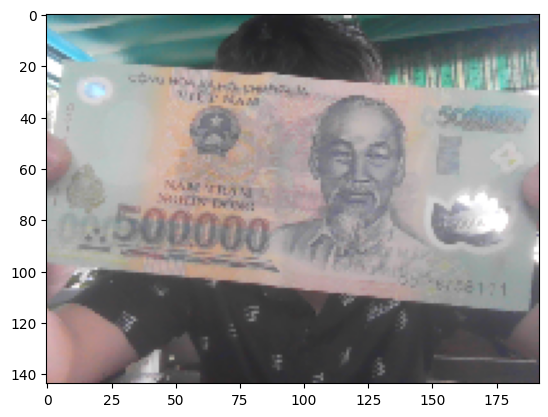

In [5]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
model100=load_model("/content/drive/MyDrive/Colab Notebooks/nhan_dang_tien.h5")

class_name = ['00000','1000','10000','100000','2000','20000','200000','5000','50000','500000']

img = load_img('/content/drive/MyDrive/tien/500000/60.png',target_size=(144,192))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,144,192,3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')
